<a href="https://colab.research.google.com/github/JuanJoMontilla/Senales-y-Sistemas/blob/main/4_Transformada_Laplace/9_Pendulo_Elastico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Caracterización de Sistemas en el Dominio del Tiempo
*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the bachelors module Signals and Systems, Communications Engineering, Universität Rostock. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Análisis de un péndulo elástico amortiguado

- El [péndulo elástico](https://en.wikipedia.org/wiki/Spring_pendulum) amortiguado es un ejemplo de un sistema mecánico que puede ser modelado por una ecuación diferencial ordinaria lineal (EDO) con coeficientes constantes.

- Desde el punto de vista de la teoría de señales y sistemas, puede ser interpretado como un sistema lineal invariante en el tiempo (SLIT).

- Las propiedades mecánicas del péndulo elástico amortiguado se analizan utilizando la teoría de los SLIT. La configuración mecánica subyacente se muestra en la siguiente figura:

![Péndulo Elástico Amortiguado](https://github.com/amalvarezme/SenalesSistemas/blob/master/4_Transformada_Laplace/damped_spring.png?raw=1)

- Un cuerpo rígido de masa $m$ está montado sobre un resorte con rigidez $k$ que está conectado al suelo.

- Un amortiguador con un coeficiente de amortiguamiento $c$ se monta paralelo al resorte para modelar la fricción presente en el sistema.

- Se asume que el movimiento de la masa a lo largo del tiempo está restringido al eje vertical, aquí indicado por $y$. Además, se asume que la masa no se mueve para $ t <0 $.

- Denotando el desplazamiento de la masa con respecto al tiempo con $y(t)$, las condiciones iniciales se formulan como $y(t)=0$ y $\frac{d y(t)}{dt}=0$ para $t<0$.

- Se utilizarán los siguientes valores $m = 0.1$,  $c = 0.1$ y $k = 2.5$ para ilustrar de manera más sencilla el siguiente ejemplo.

### Ecuación diferencial

La ecuación diferencia del sistema mecánico se obtiene al considerar el equilibrio de fuerzas ejercidas sobre la masa:

\begin{equation}
F_\text{S}(t) + F_\text{F}(t) + F_\text{I}(t) = F_\text{E}(t)
\end{equation}

Donde $F_\text{E}(t) $ denota una fuerza externa que actúa sobre la masa. La fuerza $F_\text{S}(t)$ inducida por el resorte está dada por la [ley de Hooke](https://en.wikipedia.org/wiki/Hooke%27s_law)

\begin{equation}
F_\text{S}(t) = k y(t)
\end{equation}

Es común modelar la fuerza de fricción $F_\text{F}(t)$ inducida por el amortiguador de manera proporcional a la velocidad de la masa

\begin{equation}
F_\text{F}(t) = c \frac{d y(t)}{dt}
\end{equation}

La fuerza inercial $F_\text{I}(t)$ debida a la aceleración de la masa se da como

\begin{equation}
F_\text{I}(t) = m \frac{d^2 y(t)}{dt^2}
\end{equation}

Al introducir las fuerzas anteriormente halladas en el equilibrio de fuerzas se obtiene la ecuación diferencial que describe el desplazamiento del péndulo elástico amortiguado

\begin{equation}
m \frac{d^2 y(t)}{dt^2} + c \frac{d y(t)}{dt} + k y(t) = F_\text{E}(t)
\end{equation}

Como consecuencia de la fuerza externa.

La ecuación anterior constituye una EDO con coeficientes constantes. Puede interpretarse como un SLTI con la fuerza externa $x(t)=F_\text{E}(t)$ como señal de entrada y el desplazamiento de la masa como la señal de salida $y(t)$.

### Comparación con la red eléctrica

Comparando las EDO del péndulo elástico amortiguado y el circuito RLC, se tiene que ambos constituyen una EDO de segundo orden con coeficientes constantes.

La división de la EDO del circuito por la constante $C$ resulta en:

\begin{equation}
L \frac{d^2 u_\text{o}(t)}{dt^2} + R \frac{d u_\text{o}(t)}{dt} + \frac{1}{C} u_\text{o}(t) = \frac{1}{C} u_\text{i}(t)
\end{equation}

Donde $u_\text{i}(t)$ y $u_\text{o}(t)$ denotan el voltaje de entrada y salida del circuito respesctivamente.

La comparación de la EDO anterior con la del péndulo elástico amortiguado produce [equivalencia entre sistemas](https://en.wikipedia.org/wiki/System_equivalence) así:

|                         | Circuito RLC | Péndulo elástico                          |
|-------------------------|------------------------------------|-------------------------------------------|
| Señal de entrada $x(t)$ | $u_\text{i}(t) = F_\text{E}(t) C$  | $F_\text{E}(t) = \frac{u_\text{i}(t)}{C}$ |
| Señal de salida $y(t)$  | $u_\text{o}(t)$                    | $y(t)$                                    |
|                         | $L=m$                              | $m=L$                                     |
|                         | $R=c$                              | $c=R$                                     |
|                         | $C=\frac{1}{k}$                    | $k=\frac{1}{C}$                           |

### Respuesta al Impulso

El SLIT correspondiente al péndulo puede ser caracterizado por su respuesta al impulso $h(t)$. Se define como la salida del sistema ante una entra $x(t) = \delta(t)$ en la entrada. La respuesta al impulso caracteriza el movimiento $y(t)$ de la masa ante un evento.

Primero, se define la EDO del péndulo elástico amortiguado con `SymPy`

In [1]:
%matplotlib inline
import sympy as sym
sym.init_printing()

t, m, c, k = sym.symbols('t m c k', real=True)
x = sym.Function('x')(t)
y = sym.Function('y')(t)

ode = sym.Eq(m*y.diff(t, 2) + c*y.diff(t) + k*y, x)
ode

                         2              
  d                     d               
c⋅──(y(t)) + k⋅y(t) + m⋅───(y(t)) = x(t)
  dt                      2             
                        dt              

Se guardan los valores de las constantes en un diccionario para posteriores sustituciones

In [2]:
mck = {m: 0.1, c: sym.Rational('.1'), k: sym.Rational('2.5')}
mck

{c: 1/10, k: 5/2, m: 0.1}

La respuesta al impulso se calcula al resolver la EDO

In [3]:
solution_h = sym.dsolve(ode.subs(x, sym.DiracDelta(t)).subs(y, sym.Function('h')(t)))
solution_h

                                                                         ⎛        ____________⎞    ↪
             ⎛        ____________⎞          ⎛       ____________⎞       ⎜       ╱  2         ⎟    ↪
             ⎜       ╱  2         ⎟          ⎜      ╱  2         ⎟     t⋅⎝-c + ╲╱  c  - 4⋅k⋅m ⎠    ↪
           t⋅⎝-c + ╲╱  c  - 4⋅k⋅m ⎠       -t⋅⎝c + ╲╱  c  - 4⋅k⋅m ⎠     ────────────────────────    ↪
           ────────────────────────       ─────────────────────────              2⋅m               ↪
                     2⋅m                             2⋅m              ℯ                        ⋅θ( ↪
h(t) = C₁⋅ℯ                         + C₂⋅ℯ                          + ──────────────────────────── ↪
                                                                                ____________       ↪
                                                                               ╱  2                ↪
                                                                             ╲╱  c  - 4⋅k⋅m

Las constantes de integración $C_1$ y $C_2$ se determinan a partir de las condiciones iniciales $y(t) = 0$ y $\frac{d y(t)}{dt}=0$ para $t<0$.

In [4]:
integration_constants = sym.solve( (solution_h.rhs.limit(t, 0, '-'), solution_h.rhs.diff(t).limit(t, 0, '-')), ['C1', 'C2'] )
integration_constants

{C₁: 0, C₂: 0}

La sustitución de los valores de las constantes de integración $C_1$ y $C_2$ en el resultado anterior, produce la respuesta al impulso del sistema mecánico

In [5]:
h = solution_h.subs(integration_constants)
h

          ⎛        ____________⎞            ⎛       ____________⎞      
          ⎜       ╱  2         ⎟            ⎜      ╱  2         ⎟      
        t⋅⎝-c + ╲╱  c  - 4⋅k⋅m ⎠         -t⋅⎝c + ╲╱  c  - 4⋅k⋅m ⎠      
        ────────────────────────         ─────────────────────────     
                  2⋅m                               2⋅m                
       ℯ                        ⋅θ(t)   ℯ                         ⋅θ(t)
h(t) = ────────────────────────────── - ───────────────────────────────
                 ____________                      ____________        
                ╱  2                              ╱  2                 
              ╲╱  c  - 4⋅k⋅m                    ╲╱  c  - 4⋅k⋅m         

Se grafica la respuesta para los valores de $m$, $c$ y $k$ definidas anteriormente

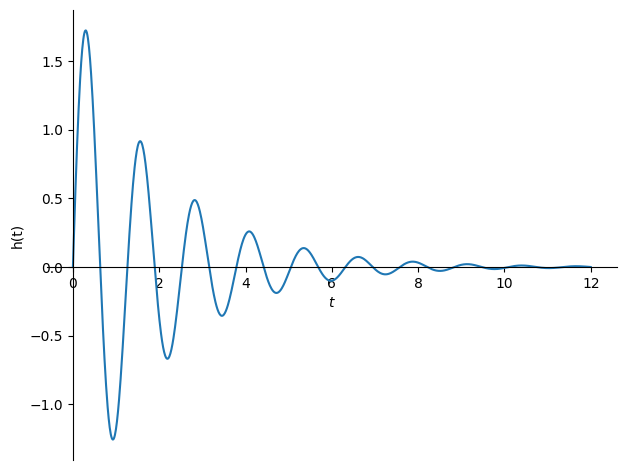

In [6]:
sym.plot(h.rhs.subs(mck), (t,0,12), ylabel=r'h(t)');

### Función de Transferencia

Para una señal exponencial de entrada $x(t)=e^{st}$, la función de transferencia $H(s)$ representa el peso de la entrada, tal que $y(t) = H(s) \cdot e^{s t}$. La función de transferencia se obtiene al introducir $x(t)$ y $y(t)$ en la EDO y resolver para $H(s)$

In [7]:
s = sym.symbols('s')
H = sym.Function('H')(s)

H, = sym.solve(ode.subs(x, sym.exp(s*t)).subs(y, H*sym.exp(s*t)).doit(), H)
H

      1       
──────────────
             2
c⋅s + k + m⋅s 

Las características de transferencia de un SLIT para señales exponenciales armónicas $e^{j\omega}=\cos(\omega t)+j\sin(\omega t)$ son de especial interés en el análisis de sistemas resonantes.

Se pueden derivar de $H(s)$ sustituyendo la frecuencia compleja $s$ por $s=j\omega$. La función de transferencia resultante $H(j\omega)$ proporciona la atenuación y la fase que el sistema agrega a una señal de entrada armónica.

In [8]:
w = sym.symbols('omega', real=True)

Hjw = H.subs(s, sym.I * w)
Hjw

       1        
────────────────
               2
ⅈ⋅c⋅ω + k - m⋅ω 

La magnitud de la función de transferencia $|H(j\omega)|$ se grafica para los valores de los parámetros dados anteriormente

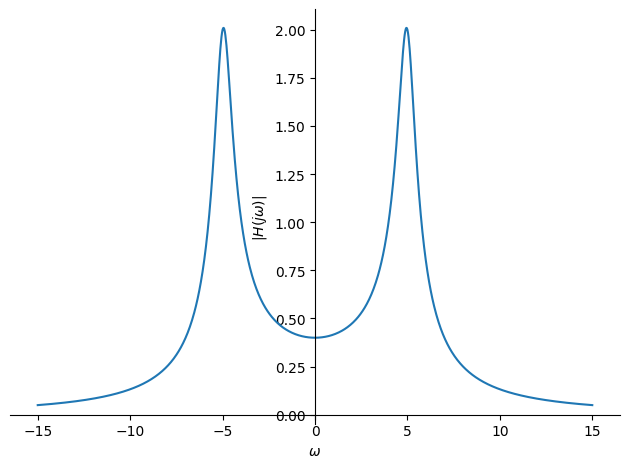

In [9]:
sym.plot(abs(Hjw.subs(mck)), (w, -15, 15), ylabel=r'$|H(j \omega)|$', xlabel=r'$\omega$');

Al inspeccionar la magnitud de la función de transferencia, se hace evidente que el péndulo del resorte amortiguado muestra resonancias (picos máximos) para dos frecuencias angulares específicas. Estas frecuencias de resonancia $\omega_0$ se calculan desde los valores extremos de $|H(j\omega)|$. Primero se calcula la derivada de $|H(j\omega)|$ con respecto a $\omega$ y luego se igual a cero

In [10]:
extrema = sym.solve(sym.Eq(sym.diff(abs(Hjw), w),0),w)
extrema

⎡         ____________        ____________⎤
⎢        ╱    2              ╱    2       ⎥
⎢       ╱    c              ╱    c        ⎥
⎢   -  ╱   - ── + k⋅m      ╱   - ── + k⋅m ⎥
⎢    ╲╱      2           ╲╱      2        ⎥
⎢0, ───────────────────, ─────────────────⎥
⎣            m                   m        ⎦

Para los máximos de la función de transferencia solo es de interés el segundo y el tercer extremo

In [11]:
w0 = extrema[1:3]
w0

⎡      ____________        ____________⎤
⎢     ╱    2              ╱    2       ⎥
⎢    ╱    c              ╱    c        ⎥
⎢-  ╱   - ── + k⋅m      ╱   - ── + k⋅m ⎥
⎢ ╲╱      2           ╲╱      2        ⎥
⎢───────────────────, ─────────────────⎥
⎣         m                   m        ⎦

Las frecuencias de resonancia se calculan para los valores de $m$, $c$ y $k$ dados anteriormente

In [12]:
[w00.subs(mck) for w00 in w0]

[-4.94974746830583, 4.94974746830583]

La fase de la función de transferencia $\varphi (j\omega)$ se calcula y grafica para los valores específicos de los elementos dados anteriormente

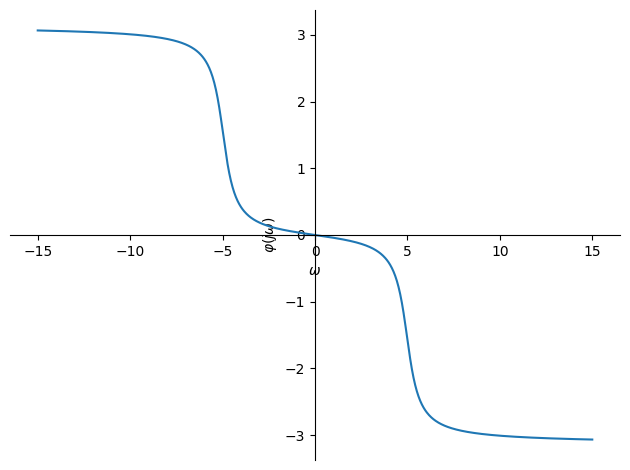

In [13]:
phi = sym.arg(Hjw)
sym.plot(phi.subs(mck), (w, -15, 15), ylabel=r'$\varphi(j \omega)$', xlabel=r'$\omega$');

# Forma general (canónica) SLITs segundo orden

- En general, la función de transferencia de un SLIT de segundo orden (donde el orden se refiere al orden de la EDO o a la cantidad de elementos almacenadores de energía), se puede definir como:

$$H(s)=\frac{1}{a_2 s^2 + a_1 s + a_o}$$

- Para tareas de modelado y control de procesos, se suele factorizar en su forma canónica como:

$$H(s)=K\frac{\omega_n^2}{s^2+2\xi \omega_n s + \omega_n^2}$$

- Con:

$$K=\frac{1}{a_o}$$
$$w_n^2=\frac{a_o}{a_2}$$
$$\xi = \frac{a_1}{2\sqrt{a_o a_2}}$$

- Las raíces del denominador (polos), se pueden entonces calcular como:

$$p_{1,2}=-\xi \omega_n \pm j \omega_n \sqrt{1-\xi^2}$$

- Deefiniendo:

$\omega_n$: frecuencia natural no amortiguada.

$\omega_d = \omega_n\sqrt{1-\xi^2}$: frecuencia natural amortiguada.

$\xi:$ factor de amortiguamiento.

- Según el factor de amortiguamiento, los SLIT de segundo orden se caracterizan como:

$0<\xi< 1$: SLIT subamortiguado.

$\xi = 1$: SLIT con amortiguamiento crítico.

$\xi > 1$: SLIT sobreamortiguado.

$\xi = 0$: SLIT oscilatorio.

$\xi < 0$: SLIT inestable (polos en el lado deracho del plano complejo $s$).

## Respuesta transitoria SLIT segundo orden

- La siguiente figura ilustra la respuesta transitoria de un SLIT de segundo orden ante una entrada escalón (Heaviside) respecto al valor del factor de amortiguamiento $\xi$:


![slit2o](https://github.com/amalvarezme/SenalesSistemas/blob/master/4_Transformada_Laplace/Sistemas2Orden.jpg?raw=1)

$M_p= 100\frac{x_{max}-x_{f}}{x_f}[\%]$: máximo sobre-impulso, donde:

Teniendo en cuenta la derivada: $\frac{dx(t)}{dt}\Big|_{t=t_p} = 0$

tenemos que: $t_p =\frac{\pi}{\omega_n\sqrt{1-\xi^2}}$

$t_u$: se conoce como el tiempo de levantamiento (10$\%$ a 90$\%$ o 0$\%$ 100$\%$ de su valor máximo o máximo pico).

$t_s$: tiempo establecimiento (tiempo en permanecer al rededor del $\pm$5$\%$ del valor de equilibrio)

$t_s=\frac{3}{\xi\omega_n}$

**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Lecture Notes on Signals and Systems* by Sascha Spors.